# Estudio del estado estacionario del oscilador disipativo

El sistema que se va a estudiar va a ser un oscilador que tiene un Hamiltoniano en el rotation frame:


\begin{equation}
    H_n=\Delta a^\dagger a+i\eta\left(a^n e^{in\theta}-(a^\dagger)^n e^{-in\theta}\right)
\end{equation}

El primer término se corresponde al detuning, mientras que el segundo es un término de squezzing que va a producir que los estados coherentes se deformen pasando de ser circulares en la función de Wigner a ser más ovalados debido a que $\Delta p\neq \Delta x$. El parámetro $\eta$ es el término que nos va a dar la fuerza del squeezing. Además, el sistema presenta una simetría $\mathbb{Z}_n$, que permite hacer el cambio $a\longrightarrow ae^{-i2\pi/n}$, por lo tanto el estado fundamental presentará una degeneración de n lóbulos separados un ángulo de $2\pi/n$. Por otro lado, $m$ va a controlar el squeezing de los estados, para valores de $m$ distintos a los de $n$ se obtendrán lóbulos más alargados que otros.

Por otro lado el tamaño de los lóbulos es proporcional al cociente entre $\eta$ y $\gamma_n$, por lo que éxiste una competencia entre el término de squeezing y nonlinear damping. Esto afectará a la forma de los lóbulos.


Como el Hamiltoniano está en térmninos de los operadores de creación y destrucción, habrá un conjunto infinito de autoestados de $H$, por lo que se podría pensar que la capacidad de almacenamiento de la red es infinita. Sin embargo, lo que se va a usar como memoria asosciativa son los estados metaestables del sistema por lo que el número de memorias que se pueden almacenar será igual al número de estados metaestables que se pueden introducir en la red

Sin embargo, la dinámica del sistema viene dada en un sistema disipativo con con un Lindbladiano de la forma:

\begin{equation}
    \dot{\rho}=-i[H_n,\rho]+\gamma_1\mathcal{D}[a]\rho+\gamma_m\mathcal{D}[a^m]\rho
\end{equation}

In [29]:
from qutip import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import scipy.integrate as sci
import scipy.special as scs



N=30

integrate=lambda x,n,m:np.sqrt(2.0/np.pi)*np.exp(-2*x**2)*scs.eval_hermite(n,np.sqrt(2)*x)*scs.eval_hermite(m,np.sqrt(2)*x)/np.sqrt(2**(n+m)*scs.gamma(n+1)*scs.gamma(m+1))
        
    
M1=np.zeros((N,N))


for i in range(N):
    for j in range(N):
        #break
        M1[i,j]=sci.quad(integrate,0.0,np.inf,args=(i,j),limit=50000)[0]
M1=Qobj(M1)



n_oscillators=1
gamma=0.0
gammam=0.01
delta=0.6
eta=0.29
n=2
theta=np.pi/2
m=4
tmax=250
samples=300
tau=100


f=lambda t:np.abs(eta)*np.tanh(t/tau)

a=destroy(N)
ad=create(N)


psi0=basis(N,0)

rho0=ket2dm(psi0)

tlist=np.linspace(0.0,5000,500)

H0=delta*ad*a
Ht=(a**n*np.exp(theta*n*1.0j)-ad**n*np.exp(-theta*n*1.0j))*1.0j

jump=[np.sqrt(gamma)*a,np.sqrt(gammam)*(a**m)]


# Estado estacionario calculado directamente resolviendo el sistema de ecuaciones y comparación con el estado teórico dado por $\ket{\psi}\sim\left(D(\alpha)+D(-\alpha)\right)S(z)\ket{0}$

Estado estacionario resolución numérica del sistema

In [2]:
L=liouvillian(H0+Ht*f(10000),jump)
E=L.eigenenergies()

print(E[-6:])

[-1.50127937e-01-4.21604879e-01j -1.50127937e-01+4.21604879e-01j
 -3.38258504e-02+2.98450922e-01j -3.38258504e-02-2.98450922e-01j
  1.36140141e-13+1.53555210e-13j  3.95606316e-13+5.28569237e-13j]


In [3]:
states=L.eigenstates()

In [4]:
A=vector_to_operator(states[1][-1]).tidyup()
A=(A+A.dag())
A=A/A.tr()
B=vector_to_operator(states[1][-2])
B=(B+B.dag())/B.tr()
B=B/B.tr()
print(A.tr())
print(B.tr())

1.0
1.0000000000000002


In [5]:
A.eigenenergies()

array([-6.79864013e-15, -6.62820221e-15, -4.71236505e-15, -3.44992582e-15,
       -1.38026028e-15, -6.15402502e-17, -4.37543105e-21,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.04489778e-16,  1.59278452e-15,
        3.61417924e-15,  4.40781689e-15,  6.44222131e-15,  1.03447179e-13,
        1.91790807e-11,  2.51051384e-09,  4.36900258e-07,  4.27149180e-05,
        7.45437259e-04,  3.34500592e-03,  9.70812345e-03,  4.06904328e-02,
        2.46154492e-01,  6.99313355e-01])

In [6]:
B.eigenenergies()

array([-2.11167478e+00, -8.32826543e-02, -6.39485003e-03, -3.74801714e-06,
       -1.64531934e-10, -6.77673883e-15, -2.44709399e-15, -8.41225980e-16,
       -4.30602276e-16, -2.14880822e-16, -1.46706633e-16, -9.47118113e-17,
       -6.59764881e-17, -4.01408191e-17, -1.38569146e-17,  1.34271497e-18,
        3.12067975e-17,  4.70255332e-17,  1.10172165e-16,  1.59508176e-16,
        2.32690307e-16,  3.94902210e-16,  1.03243229e-15,  3.75451657e-15,
        4.41068416e-13,  1.08113142e-08,  1.83948374e-04,  1.44050002e-02,
        1.75230092e-01,  3.01153698e+00])

Text(0.5, 1.0, 'Wigner final m=4')

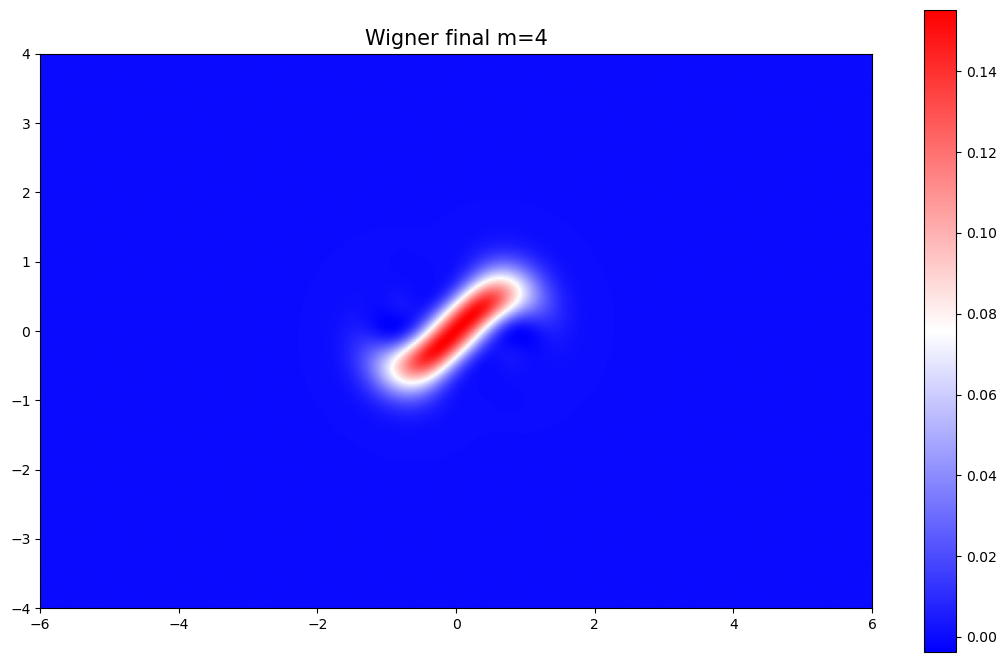

In [7]:
x=np.linspace(-13,13,500)
    
Wigner=wigner(A,x,x)

plt.figure(1,figsize=(11,11))
plt.imshow(Wigner,cmap="bwr",extent=[-6, 6, -6, 6])
plt.colorbar(shrink=0.6)

plt.ylim(-4,4)
plt.tight_layout()


plt.title("Wigner final m="+str(m),fontsize=15)
#plt.savefig("wigner_final_N_"+str(N)+"_m_"+str(m)+"_delta_"+str(delta)+"_gammam_"+str(gammam)+"_gamma_"+str(gamma)+"_eta_"+str(eta)+"_theta_"+str(theta)+"_n_"+str(n)+".png",format="png",bbox_inches="tight")

In [8]:
A.overlap((qeye(N)-(-1.0j*np.pi*ad*a).expm())/2)

(0.25660848924214585+9.304840664585131e-17j)

0.10033534773107558


Text(0.5, 1.0, 'Wigner final m=4')

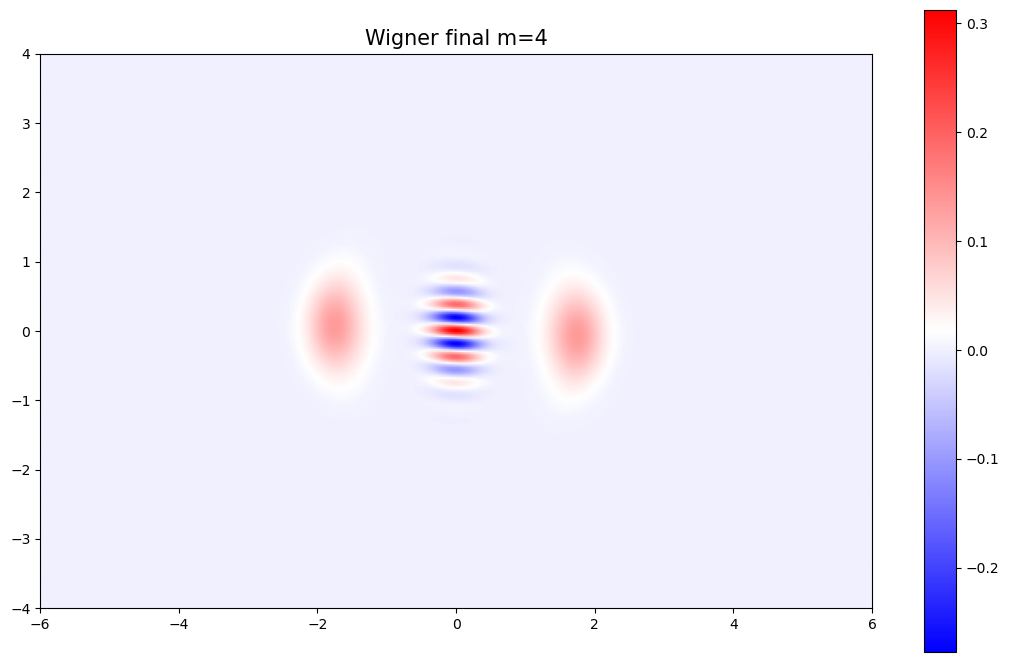

In [57]:
x=np.linspace(-13,13,500)
eta=3

print(np.arctanh(delta/(2*eta)))

theta=np.pi/2-np.arctanh(delta/(2*eta))


H0=delta*ad*a
Ht=(a**n*np.exp(theta*n*1.0j)-ad**n*np.exp(-theta*n*1.0j))*1.0j



rho=steadystate(H0+Ht*f(10000),c_ops=jump)
Wigner=wigner((rho).unit(),x,x)

plt.figure(1,figsize=(11,11))
plt.imshow(Wigner,cmap="bwr",extent=[-6, 6, -6, 6])
plt.colorbar(shrink=0.6)

plt.ylim(-4,4)
plt.tight_layout()


plt.title("Wigner final m="+str(m),fontsize=15)
#plt.savefig("wigner_final_N_"+str(N)+"_m_"+str(m)+"_delta_"+str(delta)+"_gammam_"+str(gammam)+"_gamma_"+str(gamma)+"_eta_"+str(eta)+"_theta_"+str(theta)+"_n_"+str(n)+".png",format="png",bbox_inches="tight")

Text(0.5, 1.0, 'Wigner final m=4')

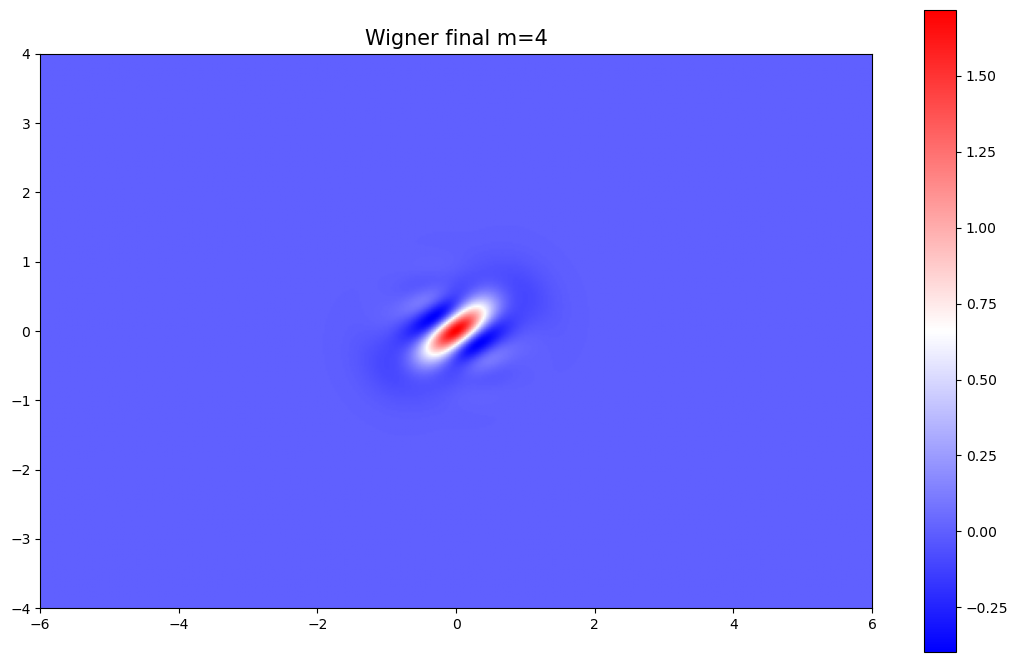

In [10]:
x=np.linspace(-13,13,500)
    
Wigner=wigner(B,x,x)

plt.figure(1,figsize=(11,11))
plt.imshow(Wigner,cmap="bwr",extent=[-6, 6, -6, 6])
plt.colorbar(shrink=0.6)

plt.ylim(-4,4)
plt.tight_layout()


plt.title("Wigner final m="+str(m),fontsize=15)
#plt.savefig("wigner_final_N_"+str(N)+"_m_"+str(m)+"_delta_"+str(delta)+"_gammam_"+str(gammam)+"_gamma_"+str(gamma)+"_eta_"+str(eta)+"_theta_"+str(theta)+"_n_"+str(n)+".png",format="png",bbox_inches="tight")

In [98]:
from qutip import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import scipy.integrate as sci
import scipy.special as scs



N=30




n_oscillators=1
gamma=0.0
gammam=1
delta=5
eta=40
n=2
theta=np.pi/2
m=4
tmax=250
samples=300
tau=100
xi=2


a1=tensor(destroy(N),qeye(N))
ad1=tensor(create(N),qeye(N))
a2=tensor(qeye(N),destroy(N))
ad2=tensor(qeye(N),create(N))


f=lambda t:np.abs(eta)*np.tanh(t/tau)





tlist=np.linspace(0.0,5000,500)

H0=delta*ad1*a1+delta*ad2*a2-xi*(ad1*a2+a1*ad2)
Ht=((a1**n+a2**n)*np.exp(theta*n*1.0j)-(ad1**n+ad2**n)*np.exp(-theta*n*1.0j))*1.0j

jump=[np.sqrt(gammam)*(a2**m),np.sqrt(gammam)*(a1**m)]


In [27]:
gamma=0.0
gammam=1
delta=2
eta=10
n=2
theta=np.pi/2
m=4
tmax=250
samples=300
tau=100
xi=20
H0=delta*ad1*a1+delta*ad2*a2-xi*(ad1*a2+a1*ad2)
Ht=((a1**n+a2**n)*np.exp(theta*n*1.0j)-(ad1**n+ad2**n)*np.exp(-theta*n*1.0j))*1.0j
(H0+eta*Ht).eigenenergies()[0:10]

array([-1725.79359269, -1725.76571018, -1546.36594972, -1546.29491883,
       -1486.20448264, -1486.20447762, -1392.41156262, -1392.2854418 ,
       -1344.35849158, -1344.35846257])

In [25]:
gamma=0.0
gammam=1
delta=7
eta=0
xi=6
H0=delta*ad1*a1+delta*ad2*a2-xi*(ad1*a2+a1*ad2)
Ht=((a1**n+a2**n)*np.exp(theta*n*1.0j)-(ad1**n+ad2**n)*np.exp(-theta*n*1.0j))*1.0j
(H0+eta*Ht).eigenenergies()[0:10]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Text(0.5, 1.0, 'Wigner final m=4')

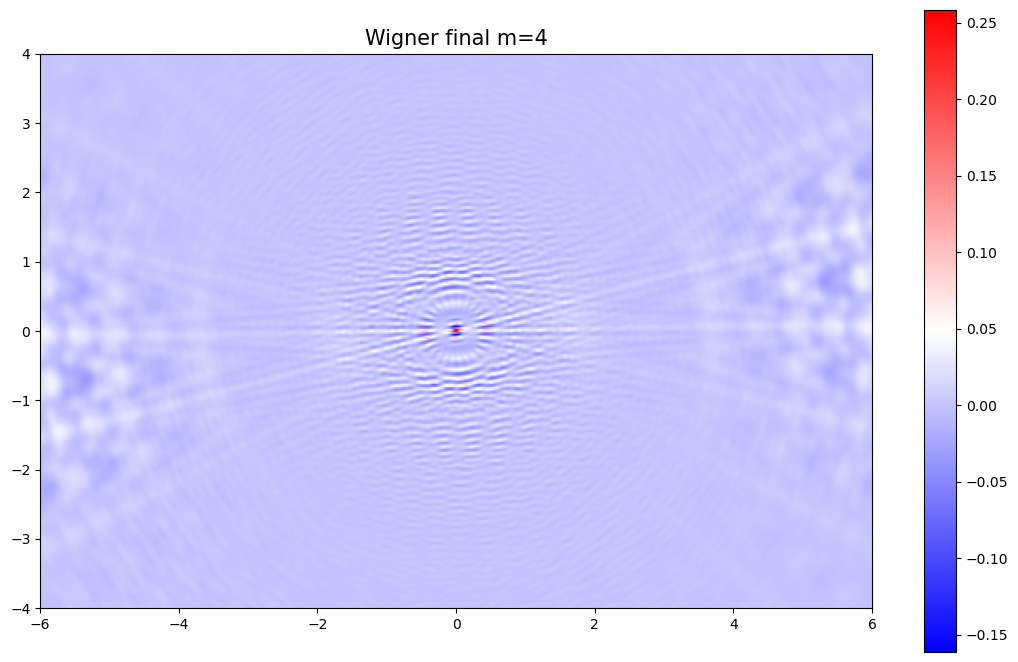

In [11]:
x=np.linspace(-13,13,500)
    
rho=steadystate(H0+Ht*eta,c_ops=jump)
Wigner=wigner(rho,x,x)

plt.figure(1,figsize=(11,11))
plt.imshow(Wigner,cmap="bwr",extent=[-6, 6, -6, 6])
plt.colorbar(shrink=0.6)

plt.ylim(-4,4)
plt.tight_layout()


plt.title("Wigner final m="+str(m),fontsize=15)
#plt.savefig("wigner_final_N_"+str(N)+"_m_"+str(m)+"_delta_"+str(delta)+"_gammam_"+str(gammam)+"_gamma_"+str(gamma)+"_eta_"+str(eta)+"_theta_"+str(theta)+"_n_"+str(n)+".png",format="png",bbox_inches="tight")

Generación del estado teórico mediante la aplicación del operador desplazamiento y el de squeezing al vacío: $\ket{\psi}\sim\left(D(\alpha)+D(-\alpha)\right)S(z)\ket{0}$

In [13]:
sqe=0.265
alpha=np.power(np.abs(eta),1/6)
psi=((displace(N,alpha)*squeeze(N,sqe)+displace(N,-alpha)*squeeze(N,sqe))*basis(N,0)).unit()

Proyección del estado estado teórico sobre el resultado de la solución al estado estacionario:

\begin{equation}
    Pro=\text{Tr}\left(\ket{\text{CAT}}\bra{\text{CAT}}\rho\right)=\bra{\text{CAT}}\rho\ket{\text{CAT}}
\end{equation}

In [14]:
expect(ket2dm(psi),rho)

0.8820433287560339

Función de Wigner de el estado teórico

Text(0.5, 1.0, 'Wigner final m=4')

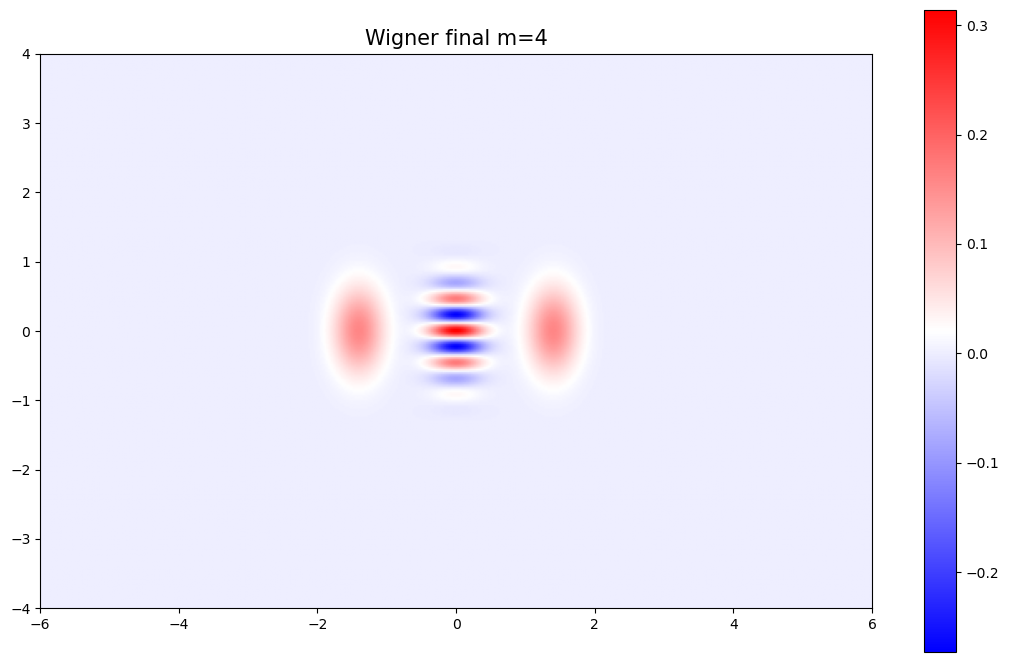

In [15]:

x=np.linspace(-13,13,500)


Wigner=wigner(ket2dm(psi),x,x)

plt.figure(1,figsize=(11,11))
plt.imshow(Wigner,cmap="bwr",extent=[-6, 6, -6, 6])
plt.colorbar(shrink=0.6)

plt.ylim(-4,4)
plt.tight_layout()


plt.title("Wigner final m="+str(m),fontsize=15)

Proyección del cat state obtenido mediante la simulación sobre el la parte positica del operador posición, sin descartar nada del espacio de momentos:


\begin{equation}
    \rho'\sim M\rho M
\end{equation}

\begin{equation}
    M=\int_0^\infty dx_i \ket{x_i}\bra{x_i}
\end{equation}

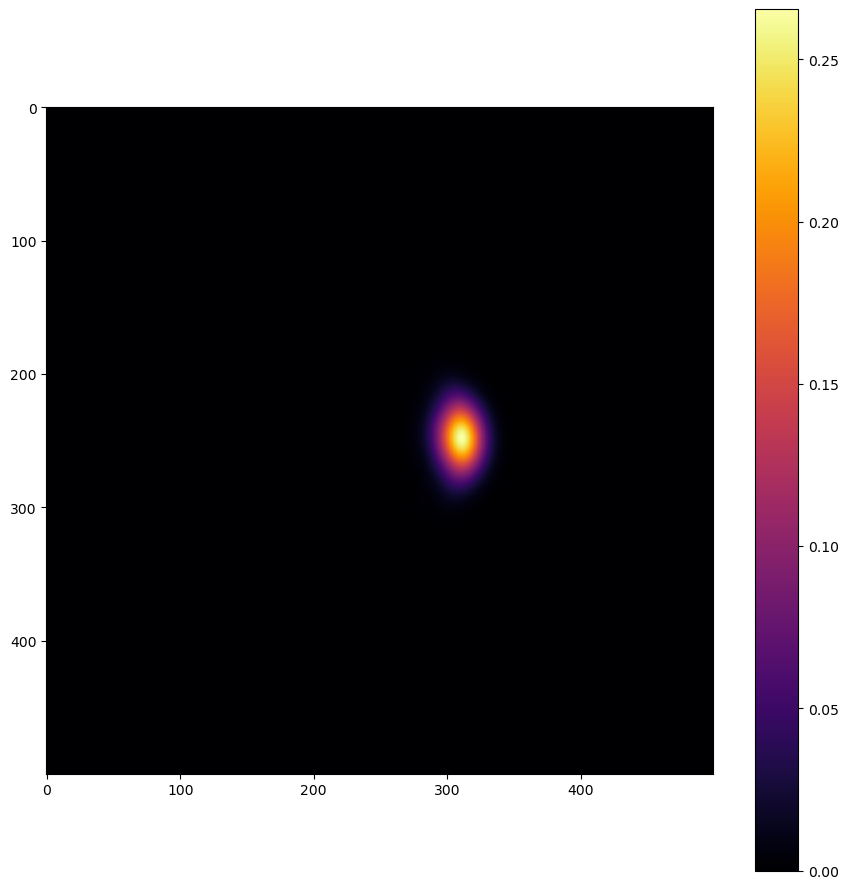

In [6]:
plt.figure(1,figsize=(9,9))
plt.imshow(wigner((M1*rho*M1).unit(),x,x),cmap="inferno")
plt.colorbar()


plt.tight_layout()

Proyección del cat state teórico sobre el la parte positica del operador posición, sin descartar nada del espacio de momentos:


\begin{equation}
    \rho'\sim M\rho M
\end{equation}

\begin{equation}
    M=\int_0^\infty dx_i \ket{x_i}\bra{x_i}
\end{equation}

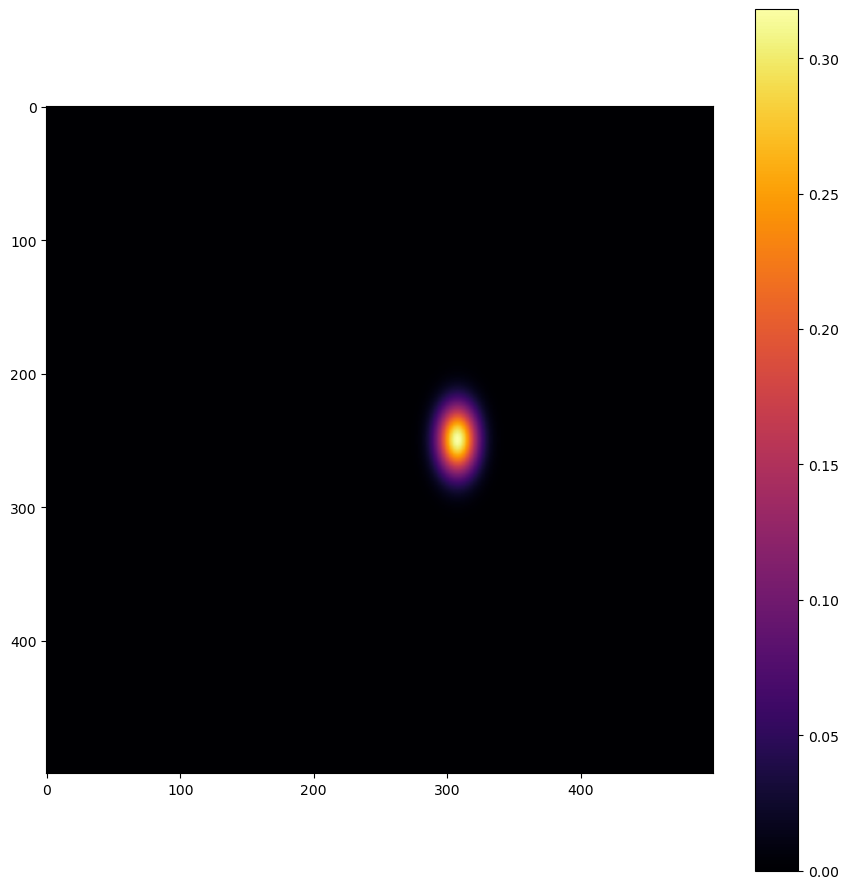

In [7]:
plt.figure(1,figsize=(9,9))
plt.imshow(wigner((M1*ket2dm(psi)*M1).unit(),x,x),cmap="inferno")
plt.colorbar()


plt.tight_layout()

# Calculo de la generación en el tiempo del cat state y estudio sobre su acción sobre el operador de aniquilación $a$

In [29]:
N=24

integrate=lambda x,n,m:np.sqrt(2.0/np.pi)*np.exp(-2*x**2)*scs.eval_hermite(n,np.sqrt(2)*x)*scs.eval_hermite(m,np.sqrt(2)*x)/np.sqrt(2**(n+m)*scs.gamma(n+1)*scs.gamma(m+1))
        
    
M1=np.zeros((N,N))


for i in range(N):
    for j in range(N):
        M1[i,j]=sci.quad(integrate,0.0,np.inf,args=(i,j),limit=50000)[0]
M1=Qobj(M1)

In [30]:
result=mesolve([H0,[Ht,f]],rho0,tlist,c_ops=jump,e_ops=[a,ad],options={
    "store_final_state":True,"store_states":True,"nsteps":100000000,"progress_bar":"tqdm","normalize_output":False,"atol":1e-8,"rtol":1e-8
})

  0%|          | 0/499 [00:00<?, ?it/s]

capi_return is NULL
Call-back cb_f_in_zvode__user__routines failed.


KeyboardInterrupt: 

Proyección del resultado de la simulación sobre el cat state teórico

In [ ]:
res=np.zeros(samples)
res2=np.zeros(samples)
for i in range(1,samples):

    b=delta/f(tlist[i])
    c=0.5*(1.0j*b-np.emath.sqrt(4-b**2))
    y=((delta*1.0j/2+f(tlist[i])*c)/c**3)**(1/6)
    x=c*y
    alpha=x
    sqe=0.2*np.exp(1.0j*np.arctan(np.imag(x)/np.real(x)))
    M=ket2dm(((squeeze(N,sqe)*displace(N,alpha)+squeeze(N,sqe)*displace(N,-alpha))*basis(N,0)).unit())
    res[i]=expect(M,result.states[i])

    res2[i]=expect(ket2dm((coherent(N,f(tlist[i])**(1/6))+coherent(N,-f(tlist[i])**(1/6))).unit()),result.states[i])


plt.figure(1,figsize=(10,6))

plt.ylim(0.0,1.0)

plt.plot(tlist[1:],res[1:])
plt.plot(tlist[1:],res2[1:])
plt.ylabel(r"$\left<CAT|SIMULATION\right>$",fontsize=15)
plt.xlabel(r"t")

Valor esperado del operado de aniquilación $a$ para la proyección sobre $x>0$ del estado teórico y el resultado de la simulación para distintos t

In [ ]:
res=np.zeros(samples,dtype=np.complex128)
res2=np.zeros(samples)
res3=np.zeros(samples)
for i in range(1,samples):

    b=delta/f(tlist[i])
    c=0.5*(1.0j*b+np.emath.sqrt(4-b**2))
    y=((delta*1.0j/2+f(tlist[i])*c)/c**3)**(1/6)
    x=c*y
    res3[i]=np.real(x)

    
    res[i]=expect(a,(M1*result.states[i]*M1).unit())



plt.figure(1,figsize=(10,6))



plt.plot(tlist,np.real(res),label=r"$R[\alpha]$")
plt.plot(tlist,np.imag(res),label=r"$Im[\alpha]$")
plt.plot(tlist,f(tlist)**(1/6),label=r"$\eta^{1/6}$")
plt.plot(tlist,np.abs(res),label=r"$|\alpha|$")
plt.ylabel(r"$\left<a\right>$",fontsize=15)
plt.xlabel(r"t")
plt.xlim(0,250)
plt.legend(loc="lower right")

Text(0.5, 1.0, 'Wigner final m=2')

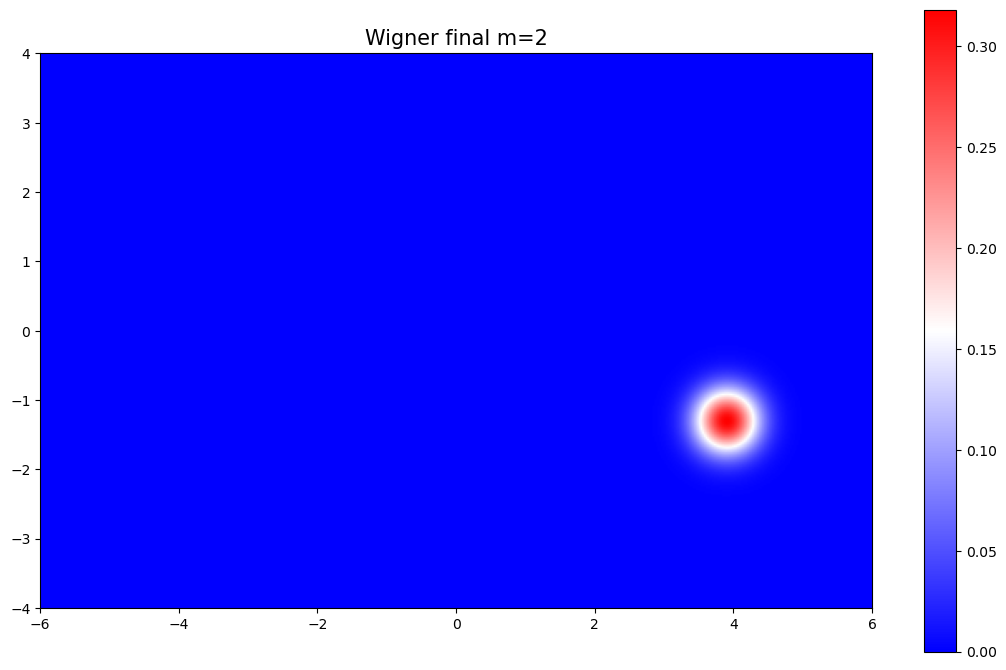

In [3]:
x=np.linspace(-13,13,500)
    
rho=coherent(N,6.0+2.j)
Wigner=wigner(rho,x,x)

plt.figure(1,figsize=(11,11))
plt.imshow(Wigner,cmap="bwr",extent=[-6, 6, -6, 6])
plt.colorbar(shrink=0.6)

plt.ylim(-4,4)
plt.tight_layout()


plt.title("Wigner final m="+str(m),fontsize=15)